# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [3]:
df1 = df.drop('emotion_in_tweet_is_directed_at', axis=1)

In [4]:
df1.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'target'}, 
          inplace=True)
df1.head()

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


# Clean Data

In [5]:
import numpy as np
np.random.seed(0)
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import string
import re, collections
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
import seaborn as sns

# nltk.download('punkt')
# nltk.download('stopwords')

In [6]:
df1 = df1.replace({'No emotion toward brand or product':'neutral'})
df1 = df1.replace({"I can't tell":'neutral'})
df1 = df1.replace({'Positive emotion':'positive'})
df1 = df1.replace({'Negative emotion':'negative'})

In [7]:
df1['tweet_text'] = df1.tweet_text.astype(str)

In [8]:
df1['clean_tweet'] = df1['tweet_text'].dropna()

## Urls

In [9]:
def remove_urls(corpus):
#     pattern = re.compile(r'https?:\/\/\S*')
    pattern = re.compile(r"(https?:\/\/)?(www\.)[-a-zA-Z0-9@:%._\+~#=]+\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)|(https?:\/\/)?(www\.)?(?!ww)[-a-zA-Z0-9@:%._\+~#=]+\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)") 
    # captures six different groups of websites
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_urls(x))

In [10]:
df1['tweet_text'][5]

'@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd'

In [11]:
df1['clean_tweet'][5]

'@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference  #iear #edchat #asd'

## Unidecode

In [12]:
import unidecode

In [13]:
df1['clean_tweet'] = df1['clean_tweet'].apply(unidecode.unidecode)

## Links

In [14]:
df1['clean_tweet'] = df1['clean_tweet'].str.replace(r"({link})", '')

In [15]:
# def remove_link(corpus):
#     pattern = re.compile(r"({link})")
#     return pattern.sub(r'', corpus)

# df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_urls(x))

In [16]:
df1['tweet_text'][32]

'Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}'

In [17]:
df1['clean_tweet'][32]

'Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. '

## Hashtags

In [18]:
def remove_hashtags(corpus):
    pattern = re.compile(r"\s?([@#][\w_-]+)")
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_hashtags(x))

In [19]:
df1['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [20]:
df1['clean_tweet'][1]

" Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at"

## Numbers

In [21]:
def remove_numbers(corpus):
    pattern = re.compile(r"\d.?")
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: remove_numbers(x))

In [22]:
df1['tweet_text'][0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [23]:
df1['clean_tweet'][0]

'. I have a  iPhone. After hrs tweeting at, it was dead!  I need to upgrade. Plugin stations at.'

## Lowercase

In [24]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['clean_tweet'].head()

0    . i have a iphone. after hrs tweeting at, it w...
1    know about ? awesome ipad/iphone app that you'...
2    can not wait for also. they should sale them d...
3    i hope this year's festival isn't as crashy as...
4    great stuff on fri: marissa mayer (google), ti...
Name: clean_tweet, dtype: object

## Stopwords

In [25]:
stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# remove stopwords, tokenize and lemmatize the text
# def preprocess(text, lemma=False):
#     text = str(text).lower().strip()
#     tokens = []
#     for token in text.split():
#         if token not in stopwords_list:
#             if lemma:
#                 tokens.append(lemmatizer.lemmatize(token))
#             else:
#                 tokens.append(token)
#     return " ".join(tokens)

# df1['tweet_text']=df1['tweet_text'].apply(lambda x:preprocess(x))

In [26]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
df1['char_count'] = df1['tweet_text'].str.len() #how many characters do we have in description? 
print(df1[['tweet_text','char_count']].head())
print(df1['char_count'].mean())

                                          tweet_text  char_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139
2  @swonderlin Can not wait for #iPad 2 also. The...          79
3  @sxsw I hope this year's festival isn't as cra...          82
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131
104.95106125591114


In [28]:
df1['stopwords'] = df1['tweet_text'].apply(lambda x: len([x for x in x.split() if x in stopwords_list]))
df1[['tweet_text','stopwords']].head(10)

,tweet_text,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,6
2,@swonderlin Can not wait for #iPad 2 also. The...,6
3,@sxsw I hope this year's festival isn't as cra...,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
5,@teachntech00 New iPad Apps For #SpeechTherapy...,0
6,nan,0
7,"#SXSW is just starting, #CTIA is around the co...",14
8,Beautifully smart and simple idea RT @madebyma...,4
9,Counting down the days to #sxsw plus strong Ca...,5


In [29]:
# remove stopwords
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df1['clean_tweet'].head()

0    . iphone. hrs tweeting at, dead! need upgrade....
1    know ? awesome ipad/iphone app likely apprecia...
2                                  wait also. sale at.
3       hope year's festival crashy year's iphone app.
4    great stuff fri: marissa mayer (google), tim o...
Name: clean_tweet, dtype: object

## Punctuation

In [30]:
def remove_punct(corpus):
    pattern = re.compile(r"[\|\^\+\[\]\(\),~\'?\.\/{}=!$%&:;_-]") # Match any character in set
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_punct(x))

In [31]:
df1['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [32]:
df1['clean_tweet'][1]

'know   awesome ipad iphone app likely appreciate design  also  they re giving free ts'

In [33]:
# remove again in case some words weren't removed
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df1['clean_tweet'].head()

0    iphone hrs tweeting dead need upgrade plugin s...
1    know awesome ipad iphone app likely appreciate...
2                                       wait also sale
3            hope year festival crashy year iphone app
4    great stuff fri marissa mayer google tim reill...
Name: clean_tweet, dtype: object

## Extra cleaning

In [34]:
# remove one or two letter words
def remove_singles(corpus):
    pattern = re.compile(r"(\b\w?\w\b)") # Match any single letter or 2 letter words in set
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_singles(x))

In [35]:
def remove_quot(corpus):
    pattern = re.compile(r"\s(quot)\s") #remove the word quot from tweets
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_quot(x))

## Create one string from column

In [36]:
tweet_str = ' '.join(df1['clean_tweet'].tolist())
tweet_str

'iphone hrs tweeting dead need upgrade plugin stations know awesome ipad iphone app likely appreciate design also giving free   wait also sale hope year festival crashy year iphone app great stuff fri marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress new ipad apps communication showcased conference nan starting around corner hop skip jump good time fan beautifully smart simple idea   wrote ipad app counting days plus strong canadian dollar means stock apple gear excited meet show sprint galaxy still running android find amp start impromptu parties wait til android app comes foursquare ups game time still prefer far best looking android app date gotta love google calendar featuring top parties show cases check   via   great ipad app haha awesomely rad ipad app holler gram ipad itunes app store via noticed dst coming weekend many iphone users hour late sxsw come sunday morning added flights matching people planes airports also downloaded iphone app nicel

In [37]:
# get rid of unneccesary word/s
# tweet_str = tweet_str.replace("quot", "")

In [38]:
# get rid of extra whitespaces
tweet_str = " ".join(tweet_str.split())
tweet_str

'iphone hrs tweeting dead need upgrade plugin stations know awesome ipad iphone app likely appreciate design also giving free wait also sale hope year festival crashy year iphone app great stuff fri marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress new ipad apps communication showcased conference nan starting around corner hop skip jump good time fan beautifully smart simple idea wrote ipad app counting days plus strong canadian dollar means stock apple gear excited meet show sprint galaxy still running android find amp start impromptu parties wait til android app comes foursquare ups game time still prefer far best looking android app date gotta love google calendar featuring top parties show cases check via great ipad app haha awesomely rad ipad app holler gram ipad itunes app store via noticed dst coming weekend many iphone users hour late sxsw come sunday morning added flights matching people planes airports also downloaded iphone app nicely done m

# Feature Engineering

## Lemmatize text

In [39]:
lemma_tweet = lambda x: lemmatize_text(x)
lemma = WordNetLemmatizer()
tweet_text = [lemma.lemmatize(tweet_str) for text in tweet_str]

In [40]:
type(tweet_text)

list

In [43]:
from wordcloud import WordCloud

wordcloud = WordCloud(backgroud_color = 'white',
                     stopwords=stopwords_list,
                     max_words=100,
                     random_state=42
                     ).generate(str(tweet_text))
print(wordcloud)
fig= plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

TypeError: __init__() got an unexpected keyword argument 'backgroud_color'

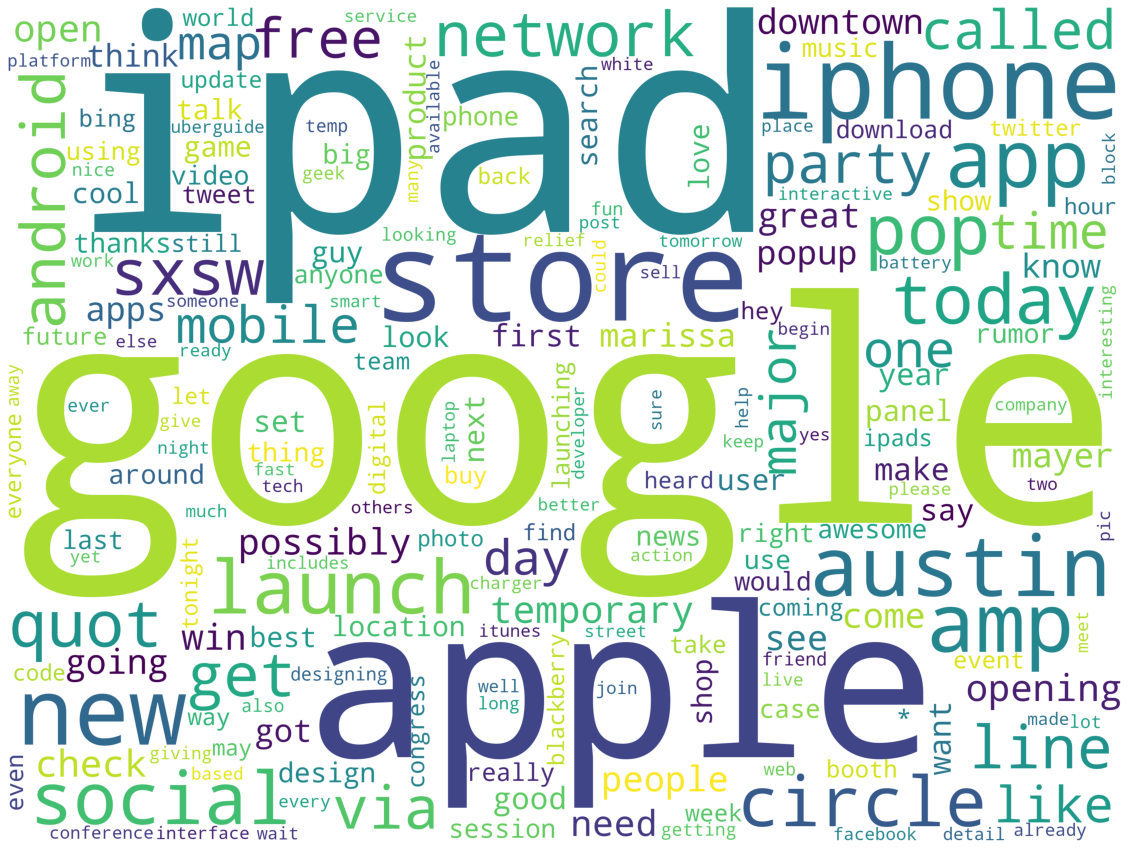

In [42]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", width=3200, height=2400)
cloud = wc.generate_from_frequencies(dict(common_tag_200))
plt.figure(figsize=(20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## Tokenize

In [51]:
tokens = nltk.word_tokenize(tweet_str)
print(len(tokens))

76327


In [52]:
tokens

['iphone',
 'hrs',
 'tweeting',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations',
 'know',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'giving',
 'free',
 'wait',
 'also',
 'sale',
 'hope',
 'year',
 'festival',
 'crashy',
 'year',
 'iphone',
 'app',
 'great',
 'stuff',
 'fri',
 'marissa',
 'mayer',
 'google',
 'tim',
 'reilly',
 'tech',
 'books',
 'conferences',
 'amp',
 'matt',
 'mullenweg',
 'wordpress',
 'new',
 'ipad',
 'apps',
 'communication',
 'showcased',
 'conference',
 'nan',
 'starting',
 'around',
 'corner',
 'hop',
 'skip',
 'jump',
 'good',
 'time',
 'fan',
 'beautifully',
 'smart',
 'simple',
 'idea',
 'wrote',
 'ipad',
 'app',
 'counting',
 'days',
 'plus',
 'strong',
 'canadian',
 'dollar',
 'means',
 'stock',
 'apple',
 'gear',
 'excited',
 'meet',
 'show',
 'sprint',
 'galaxy',
 'still',
 'running',
 'android',
 'find',
 'amp',
 'start',
 'impromptu',
 'parties',
 'wait',
 'til',
 'android',
 'app',
 'comes',
 'foursqua

## Word Cloud

In [41]:
from collections import Counter
count = Counter(tweet_text)
common_tag_200 = count.most_common(16208)
common_tag_200[:10]

[('google', 2333),
 ('ipad', 2327),
 ('apple', 1907),
 ('store', 1518),
 ('iphone', 1321),
 ('new', 1090),
 ('austin', 862),
 ('amp', 836),
 ('app', 805),
 ('launch', 673)]

**So of course the most frequent words are the brands we're focused on: google and apple. Then we get some products and descriptions such as iPad, iPhone, new, and free.**

In [43]:
df1

,tweet_text,target,clean_tweet,char_count,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative,iphone hrs tweeting dead need upgrade plugin s...,127,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive,know awesome ipad iphone app likely appreciate...,139,6
2,@swonderlin Can not wait for #iPad 2 also. The...,positive,wait also sale,79,6
3,@sxsw I hope this year's festival isn't as cra...,negative,hope year festival crashy year iphone app,82,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive,great stuff fri marissa mayer google tim reill...,131,1
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},positive,ipad everywhere,29,0
9089,"Wave, buzz... RT @mention We interrupt your re...",neutral,wave buzz interrupt regularly scheduled geek...,125,2
9090,"Google's Zeiger, a physician never reported po...",neutral,google zeiger physician never reported potenti...,145,2
9091,Some Verizon iPhone customers complained their...,neutral,verizon iphone customers complained time fell ...,140,7


## Word Clouds By Emotion

In [44]:
pos_comments = df1[df1['target'] == 'positive']['clean_tweet']
pos_words = ' '.join(pos_comments).split()
pos_words = pd.DataFrame(pos_words, columns=['words'])['words'].value_counts()[1:]

neut_comments = df1[df1['target'] == 'neutral']['clean_tweet']
neut_words = ' '.join(neut_comments).split()
neut_words = pd.DataFrame(neut_words, columns=['words'])['words'].value_counts()[1:]

neg_comments = df1[df1['target'] == 'negative']['clean_tweet']
neg_words = ' '.join(neg_comments).split()
neg_words = pd.DataFrame(neg_words, columns=['words'])['words'].value_counts()[1:]

In [45]:
pos_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Purples', background_color='white', max_words=50)
pos_wc = pos_wc.generate_from_frequencies(pos_words)

neut_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
neut_wc = neut_wc.generate_from_frequencies(neut_words)

neg_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Reds', background_color='white', max_words=50)
neg_wc = neg_wc.generate_from_frequencies(neg_words)

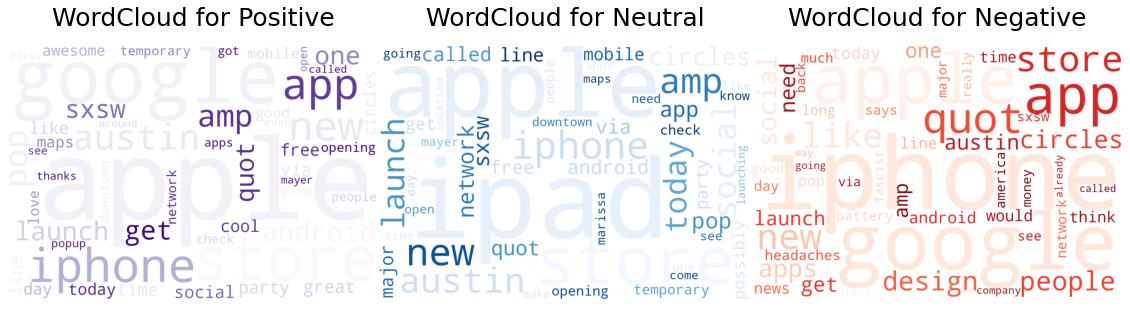

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

axes[0].set_title('WordCloud for Positive', size=25, pad=20)
axes[0].imshow(pos_wc)
axes[0].axis('off')

axes[1].set_title('WordCloud for Neutral', size=25, pad=20)
axes[1].imshow(neut_wc)
axes[1].axis('off')

axes[2].set_title('WordCloud for Negative', size=25, pad=20)
axes[2].imshow(neg_wc)
axes[2].axis('off')

fig.subplots_adjust(hspace=1,wspace=0.0)

**We can see words like amp, awesome, and great in the positive word clouds. Temporary, network, need in neutral word clouds. Long, line, headaches in negative word clouds. You can also see there are common words among all the word clouds, meaning that words alone can have a lot of different meaning. We need to get more context from each tweet to understand the reasoning of the sentiment.**

## Pos Tag

In [47]:
token_pos = nltk.pos_tag(tokens)
postags_df = pd.DataFrame(token_pos, columns=('word', 'POS'))
pos_sum = postags_df.groupby('POS', as_index=False).count()
pos_sum.sort_values(['word'], ascending=False)

,POS,word
11,NN,39426
7,JJ,14981
24,VBG,3961
26,VBP,3230
16,RB,3108
23,VBD,2328
6,IN,1772
22,VB,1755
13,NNS,1562
25,VBN,1543


In [48]:
#getting just the nouns, verbs, and adjectives
filtered_pos = [ ]
for one in token_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS' or one[1] == 'VBP' or one[1] == 'VBN' or one[1] == 'VBD' or one[1] == 'VB' or one[1] == 'VBZ' or one[1] == 'JJ' or one[1] == 'JJR' or one[1] == 'JJS':
        filtered_pos.append(one)
print (len(filtered_pos))

65825


In [49]:
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
print(top_100_words)

[(('apple', 'NN'), 1907), (('google', 'NN'), 1627), (('store', 'NN'), 1494), (('ipad', 'NN'), 1198), (('new', 'JJ'), 1090), (('iphone', 'NN'), 1086), (('ipad', 'JJ'), 910), (('social', 'JJ'), 650), (('austin', 'NN'), 601), (('circle', 'NN'), 583), (('today', 'NN'), 579), (('pop', 'NN'), 534), (('app', 'NN'), 526), (('launch', 'NN'), 488), (('network', 'NN'), 472), (('amp', 'NN'), 462), (('line', 'NN'), 442), (('party', 'NN'), 393), (('google', 'JJ'), 380), (('free', 'JJ'), 367), (('called', 'VBN'), 355), (('sxsw', 'NN'), 349), (('quot', 'NN'), 318), (('time', 'NN'), 306), (('major', 'JJ'), 304), (('day', 'NN'), 287), (('temporary', 'JJ'), 264), (('open', 'JJ'), 253), (('google', 'VBP'), 236), (('android', 'JJ'), 235), (('people', 'NNS'), 231), (('great', 'JJ'), 222), (('get', 'VB'), 218), (('mobile', 'JJ'), 212), (('map', 'NN'), 212), (('mayer', 'NN'), 195), (('downtown', 'NN'), 192), (('popup', 'NN'), 186), (('check', 'NN'), 182), (('got', 'VBD'), 176), (('austin', 'JJ'), 174), (('goo

In [50]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head(10)

,count,Word
0,1907,apple
1,1627,google
2,1494,store
3,1198,ipad
4,1090,new
5,1086,iphone
6,910,ipad
7,650,social
8,601,austin
9,583,circle


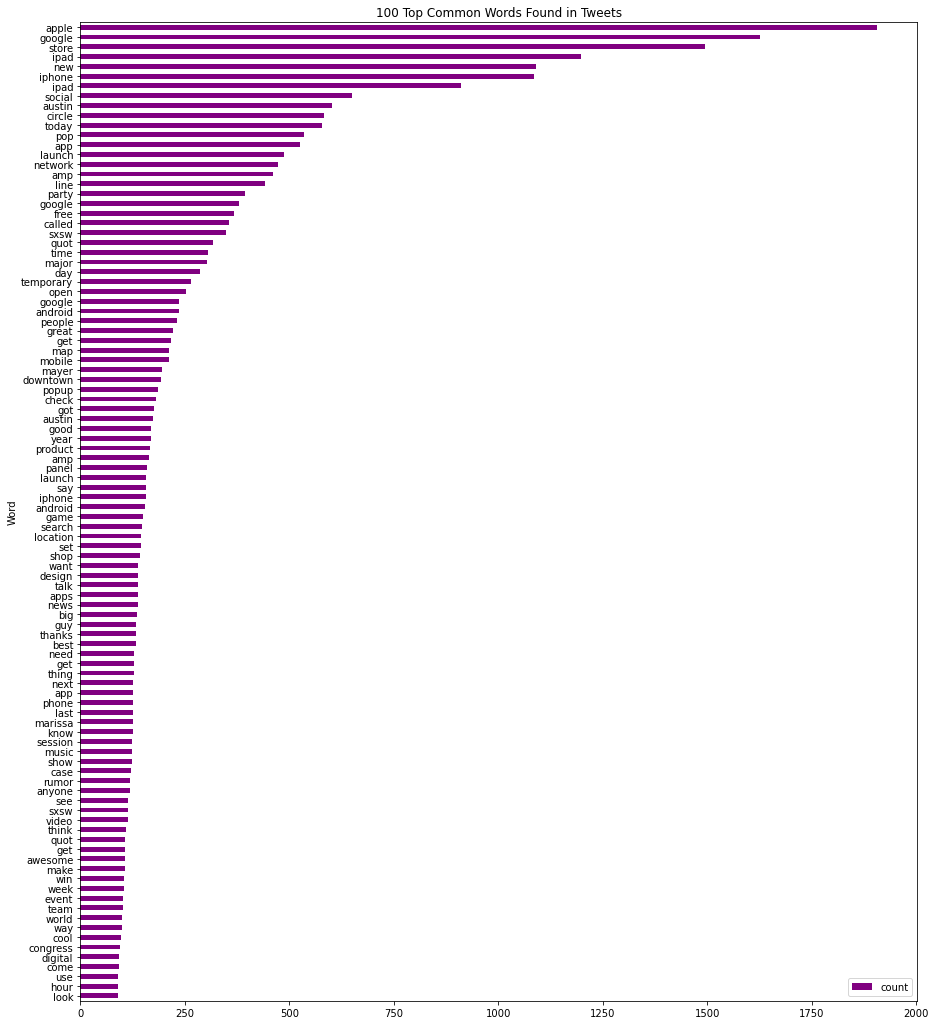

In [51]:
fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("100 Top Common Words Found in Tweets")

plt.show()

## Ngrams

**Bigrams**

In [52]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = BigramCollocationFinder.from_words(tokens)
tweet_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)
tweet_scored[:20]

[(('apple', 'store'), 0.007336853276036003),
 (('social', 'network'), 0.005961193286779252),
 (('new', 'social'), 0.005437132338490967),
 (('pop', 'store'), 0.004847563771666645),
 (('network', 'called'), 0.004257995204842323),
 (('called', 'circle'), 0.004126979967770251),
 (('google', 'launch'), 0.004113878444063045),
 (('major', 'new'), 0.0038518479699189015),
 (('launch', 'major'), 0.00372083273284683),
 (('possibly', 'today'), 0.0031443656897297157),
 (('circle', 'possibly'), 0.0030526550237792655),
 (('iphone', 'app'), 0.002738218454806294),
 (('apple', 'opening'), 0.0026989138836846726),
 (('temporary', 'store'), 0.0026334062651486366),
 (('apple', 'pop'), 0.002581000170319808),
 (('store', 'austin'), 0.002541695599198187),
 (('google', 'map'), 0.002371375791004494),
 (('downtown', 'austin'), 0.0023451727435900797),
 (('marissa', 'mayer'), 0.0023320712198828726),
 (('store', 'downtown'), 0.0022796651250540437)]

**Trigrams**

In [53]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
tri_finder = TrigramCollocationFinder.from_words(tokens)
tri_scored = tri_finder.score_ngrams(trigram_measures.raw_freq)
tri_scored[:20]

[(('new', 'social', 'network'), 0.005070289674689166),
 (('social', 'network', 'called'), 0.004244893681135116),
 (('network', 'called', 'circle'), 0.004048370825527009),
 (('major', 'new', 'social'), 0.0038387464462116944),
 (('launch', 'major', 'new'), 0.00372083273284683),
 (('google', 'launch', 'major'), 0.003340888545337823),
 (('circle', 'possibly', 'today'), 0.0030264519763648513),
 (('called', 'circle', 'possibly'), 0.0029609443578288157),
 (('apple', 'pop', 'store'), 0.002122446840567558),
 (('store', 'downtown', 'austin'), 0.002030736174617108),
 (('opening', 'temporary', 'store'), 0.001493573702621615),
 (('apple', 'opening', 'temporary'), 0.0014542691314999934),
 (('pop', 'store', 'austin'), 0.001323253894427922),
 (('temporary', 'store', 'downtown'), 0.0012839493233063005),
 (('pop', 'apple', 'store'), 0.0011660356099414363),
 (('downtown', 'austin', 'ipad'), 0.0009564112306261218),
 (('today', 'google', 'launch'), 0.0009433097069189147),
 (('austin', 'ipad', 'launch'), 0.

**Tetragrams**

In [54]:
from nltk.util import ngrams
tetragram = ngrams(tokens, 4)

In [55]:
tetragramFreq = collections.Counter(tetragram)
tetragramFreq.most_common(20)

[(('new', 'social', 'network', 'called'), 319),
 (('social', 'network', 'called', 'circle'), 309),
 (('major', 'new', 'social', 'network'), 284),
 (('launch', 'major', 'new', 'social'), 283),
 (('google', 'launch', 'major', 'new'), 255),
 (('network', 'called', 'circle', 'possibly'), 226),
 (('called', 'circle', 'possibly', 'today'), 224),
 (('apple', 'opening', 'temporary', 'store'), 103),
 (('temporary', 'store', 'downtown', 'austin'), 95),
 (('opening', 'temporary', 'store', 'downtown'), 92),
 (('store', 'downtown', 'austin', 'ipad'), 72),
 (('circle', 'possibly', 'today', 'google'), 69),
 (('app', 'store', 'includes', 'uberguide'), 67),
 (('new', 'app', 'store', 'includes'), 66),
 (('downtown', 'austin', 'ipad', 'launch'), 66),
 (('possibly', 'today', 'google', 'launch'), 66),
 (('rumor', 'apple', 'opening', 'temporary'), 59),
 (('today', 'google', 'launch', 'major'), 58),
 (('apple', 'opening', 'pop', 'store'), 53),
 (('launch', 'new', 'social', 'network'), 49)]

**Here you can see the most common combos deals with brands and social events. This makes sense when companies like to create events to display their new products, whether it's an app or a phone.**

# Vectorize Data

**Before building the deep learning model, we are going to split the data into train and test. Then we will vectorize and embed the tweets. To deal with overfitting we will balance the train set and reduce the number of features.** 

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import string
from sklearn.metrics import plot_confusion_matrix

In [57]:
y = df1['target']
X = df1['clean_tweet']

**TF_IDF**

In [58]:
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [59]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

In [60]:
tf_idf_train.shape

(6819, 7059)

# Glove

In [53]:
data = df1['tweet_text'].map(word_tokenize).values

In [54]:
data

array([list(['.', '@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#', 'SXSW', '.']),
       list(['@', 'jessedee', 'Know', 'about', '@', 'fludapp', '?', 'Awesome', 'iPad/iPhone', 'app', 'that', 'you', "'ll", 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', 'they', "'re", 'giving', 'free', 'Ts', 'at', '#', 'SXSW']),
       list(['@', 'swonderlin', 'Can', 'not', 'wait', 'for', '#', 'iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#', 'SXSW', '.']),
       ...,
       list(['Google', "'s", 'Zeiger', ',', 'a', 'physician', 'never', 'reported', 'potential', 'AE', '.', 'Yet', 'FDA', 'relies', 'on', 'physicians', '.', '&', 'quot', ';', 'We', "'re", 'operating', 'w/out', 'data.', '&', 'quot', ';', '#', 'sxsw', '#', 'health2dev']),
       list(['Some', 'Verizon', 'iPhone', 'customers', 'compla

In [59]:
total_vocab = set(word for tweet_text in data for word in tweet_text)

In [61]:
total_vocab

{'shifts',
 'bumped',
 'headed',
 'finger',
 'Cute',
 'HQ',
 'market',
 'sched',
 'flooding',
 'obsession',
 'deficit',
 'unabashed',
 'Machine',
 'www.skylines.net',
 'verizonFTW',
 'Hopefully',
 'mays',
 '100s',
 'gone',
 'ended',
 'urge',
 'register',
 'Talk',
 'cautiously',
 'lbs',
 'Rumour',
 'surprising',
 'bb',
 'Evidence',
 'hipstamatic',
 'challenging',
 'Terror',
 'Quotables',
 'bmm',
 'arg',
 'eventprofs',
 'bajillions',
 'Disgusted',
 'Scott',
 'back-up',
 '\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b\x81Á\x8bââ\x8b\x81_\x8b\x81£\x8b\x81\x8f\x8bâ_\x8bÛâRT',
 'St.',
 'JCPenney',
 'ref',
 'physical',
 'Down',
 'temporary',
 'fancrazed',
 'havin',
 'images',
 'Verne',
 'olderadults',
 'Badass',
 'gamesfortv',
 'Four',
 'il',
 'saw',
 'Liz',
 'reminding',
 '3bil',
 'definition',
 'ones',
 'crossing',
 'wot',
 'brains',
 'ATMS',
 'engineer',
 'zazzlesxsw',
 'Offering',
 'boom',
 'ahead',
 'maggiemaes',
 'begun',
 'siren',
 'gummy',
 'Ahead',
 'Volunteer',
 'Dataset

In [62]:
glove = {}
with open('glove.6B.200d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocab:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [63]:
glove['school']

array([ 5.0205e-01, -2.3272e-01, -2.0607e-01, -3.3978e-01,  3.5746e-01,
       -4.0531e-01, -5.7823e-02, -1.4541e-01, -4.2710e-01,  2.0453e-01,
        4.7929e-01, -1.5881e-02,  2.4815e-01, -6.2464e-01,  7.4392e-01,
        7.1682e-02, -3.9319e-01, -6.7314e-01,  2.1295e-01, -1.3656e-01,
        2.4048e-02,  3.3683e+00,  6.4333e-01,  3.7011e-01,  1.8458e-01,
        2.1363e-01,  2.3289e-01, -5.5746e-01,  4.9536e-01, -3.8248e-01,
        4.6558e-01,  2.8767e-01, -7.3209e-01,  1.5010e-01, -4.9322e-01,
        9.0658e-02, -1.0101e+00,  1.3776e-01,  5.7616e-01, -2.1865e-01,
       -9.1398e-02, -4.5487e-01, -1.5604e-01, -5.2711e-03, -1.4471e-02,
       -2.9410e-01,  1.1072e+00, -6.9846e-02, -3.2164e-01,  1.2522e-01,
        3.7476e-01,  3.1057e-01, -4.7349e-01,  5.4686e-01, -6.6533e-01,
       -7.9870e-02, -4.3736e-01,  3.6182e-01, -6.5101e-01, -2.6352e-01,
        4.4828e-01,  2.0177e-01, -7.5881e-02,  8.3842e-01, -4.7434e-01,
        4.4438e-01,  1.4229e-01,  2.2366e-02,  4.1243e-01,  4.82

In [64]:
from gensim.models import word2vec

In [65]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [75]:
rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression(max_iter=1000))])

In [76]:
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

In [73]:
target = df1['target']

In [77]:
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [78]:
scores

[('Random Forest', 0.6415923931221941),
 ('Support Vector Machine', 0.6310341197587188),
 ('Logistic Regression', 0.6395032486139051)]

In [79]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [80]:
y = pd.get_dummies(target).values

In [81]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df1['tweet_text']))
list_tokenized_tweet = tokenizer.texts_to_sequences(df1['tweet_text'])
X_t = sequence.pad_sequences(list_tokenized_tweet, maxlen=100)

In [82]:
model = Sequential()

In [83]:
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))

In [84]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 25)          15400     
_________________________________________________________________
global_max_pooling1d (Global (None, 25)                0         
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 41)                2

In [88]:
model.fit(X_t, y, epochs=3, batch_size=32, validation_split=0.4)

Epoch 1/3


ValueError: in user code:

    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 3) and (None, 41) are incompatible


# Modeling

* Logistic Regression - known to be very effective on text data. It's also a great starter algorithm for text classification.

* Naives Bayes - Applies Bayes' theorem with strong independence assumptions between the features. It's more of a supervised approach. 

In [61]:
lr_classifier = LogisticRegression()
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [62]:
lr_classifier.fit(tf_idf_train, y_train)
lr_train_preds = lr_classifier.predict(tf_idf_train)
lr_test_preds = lr_classifier.predict(tf_idf_test)

In [63]:
nb_classifier.fit(tf_idf_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_train)
nb_test_preds = nb_classifier.predict(tf_idf_test)

In [64]:
rf_classifier.fit(tf_idf_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_train)
rf_test_preds = rf_classifier.predict(tf_idf_test)

In [65]:
lr_train_score = accuracy_score(y_train, lr_train_preds)
lr_test_score = accuracy_score(y_test, lr_test_preds)
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print('Logistic Regression')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lr_train_score, lr_test_score))
print("")
print('-'*70)
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Logistic Regression
Training Accuracy: 0.8026 		 Testing Accuracy: 0.6834

----------------------------------------------------------------------
Multinomial Naive Bayes
Training Accuracy: 0.7582 		 Testing Accuracy: 0.657

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9591 		 Testing Accuracy: 0.6843


**The models did okay. Since there are three classes, the naive accuracy rate would be ~33%. With scores of 68, 66, and 68 percent did much better than random guessing. With RF there seems to be some evidence of overfitting. This model can be improved with some tuning.**

In [66]:
def confusion_plot(classifier):
    class_names = ['positive', 'neutral', 'negative']
    titles_options = [(f"{classifier}Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, tf_idf_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
                                 
        disp.ax_.set_title(title)
        
#         print(title)
#         print(disp.confusion_matrix)
    print(classification_report(y_test, classifier.predict(tf_idf_test)))
    return plt.show()

              precision    recall  f1-score   support

    negative       0.64      0.21      0.31       144
     neutral       0.70      0.87      0.77      1389
    positive       0.64      0.43      0.52       741

    accuracy                           0.68      2274
   macro avg       0.66      0.50      0.53      2274
weighted avg       0.67      0.68      0.66      2274



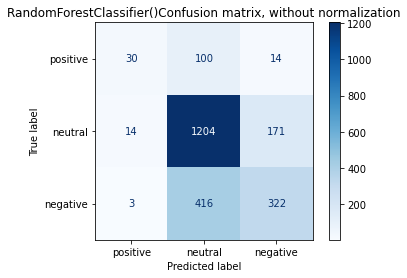

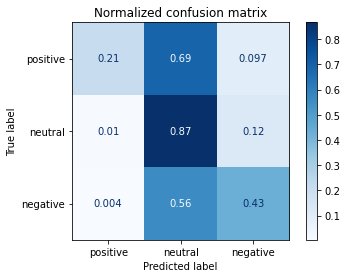

              precision    recall  f1-score   support

    negative       0.64      0.05      0.09       144
     neutral       0.70      0.88      0.78      1389
    positive       0.64      0.44      0.52       741

    accuracy                           0.68      2274
   macro avg       0.66      0.46      0.46      2274
weighted avg       0.67      0.68      0.65      2274



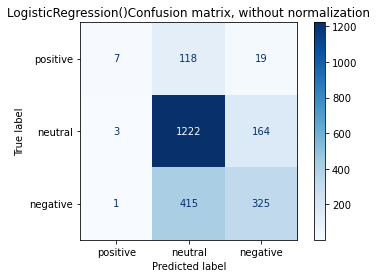

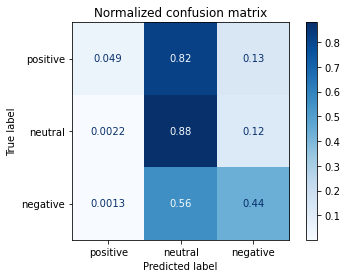

              precision    recall  f1-score   support

    negative       0.80      0.03      0.05       144
     neutral       0.65      0.93      0.77      1389
    positive       0.67      0.26      0.38       741

    accuracy                           0.66      2274
   macro avg       0.71      0.41      0.40      2274
weighted avg       0.67      0.66      0.60      2274



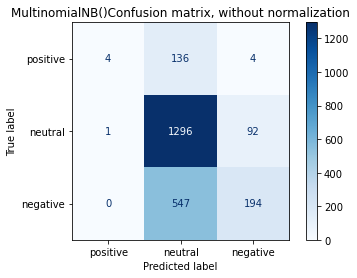

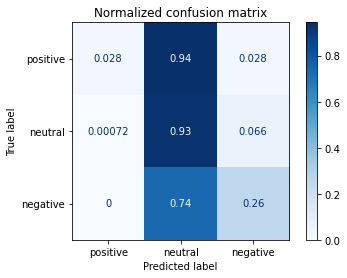

In [67]:
confusion_plot(rf_classifier)
confusion_plot(lr_classifier)
confusion_plot(nb_classifier)

In [105]:
rf_classifier_2 = RandomForestClassifier(n_estimators=200, min_samples_leaf= 5,
                                         min_samples_split = 20)

rf_classifier_2.fit(tf_idf_train, y_train)
rf_train_preds = rf_classifier_2.predict(tf_idf_train)
rf_test_preds = rf_classifier_2.predict(tf_idf_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print(rf_train_score, rf_test_score)

0.7201935767707875 0.6662269129287599


              precision    recall  f1-score   support

    negative       0.50      0.02      0.04       144
     neutral       0.66      0.95      0.78      1389
    positive       0.72      0.26      0.38       741

    accuracy                           0.67      2274
   macro avg       0.63      0.41      0.40      2274
weighted avg       0.67      0.67      0.60      2274



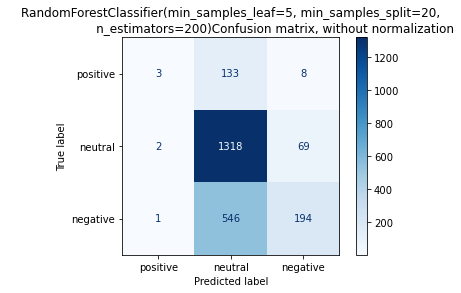

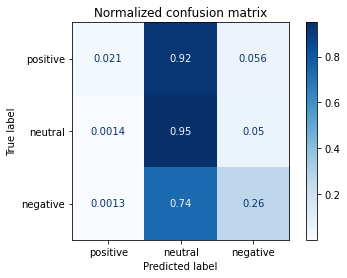

In [106]:
confusion_plot(rf_classifier_2)

**Since for all the models the recall is lower than the precision. In this case, the model has problems detecting the class well but when it does the results are somewhat trustworthy. Class imbalance might have some cause for this. For now Random Forest has the best model so far. Next going to try to tune some of the parameters to get a better accuracy and recall.**

In [88]:
from sklearn.model_selection import GridSearchCV

In [87]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_model = forest_clf.fit(tf_idf_train, y_train)

In [97]:
min_split = range(5, 20)
min_leaf = range(5,20)

In [ ]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']

In [103]:
forest_params = {'criterion' : ['gini', 'entropy'],
                 'min_samples_split' : [5, 10, 15, 20],
                 'min_samples_leaf' : [5, 10, 15, 20],
                'class_weight': [None, 'balanced']}
grid_search = GridSearchCV(forest_model, param_grid=forest_params, scoring='accuracy')
grid_search.fit(tf_idf_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [5, 10, 15, 20]},
             scoring='accuracy')

In [104]:
grid_search.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 20}

## Word2Vec

In [72]:
from gensim.models import Word2Vec

In [74]:
data = df1['clean_tweet'].map(word_tokenize)
data[:5]

0    [iphone, hrs, tweeting, dead, need, upgrade, p...
1    [know, awesome, ipad, iphone, app, likely, app...
2                                   [wait, also, sale]
3    [hope, year, festival, crashy, year, iphone, app]
4    [great, stuff, fri, marissa, mayer, google, ti...
Name: clean_tweet, dtype: object

In [75]:
model = Word2Vec(data, size=100, window=5, min_count=2, workers=4)

In [76]:
model.train(data, total_examples=model.corpus_count, epochs=10)

(594064, 763270)

In [77]:
wv = model.wv

In [78]:
wv.vocab

{'iphone': <gensim.models.keyedvectors.Vocab at 0x14821d87880>,
 'hrs': <gensim.models.keyedvectors.Vocab at 0x14821d878e0>,
 'tweeting': <gensim.models.keyedvectors.Vocab at 0x14821d87670>,
 'dead': <gensim.models.keyedvectors.Vocab at 0x14821d87970>,
 'need': <gensim.models.keyedvectors.Vocab at 0x14821d879d0>,
 'upgrade': <gensim.models.keyedvectors.Vocab at 0x14821d87a30>,
 'plugin': <gensim.models.keyedvectors.Vocab at 0x14821d87a90>,
 'stations': <gensim.models.keyedvectors.Vocab at 0x14821d87af0>,
 'know': <gensim.models.keyedvectors.Vocab at 0x14821d87b50>,
 'awesome': <gensim.models.keyedvectors.Vocab at 0x14821d87910>,
 'ipad': <gensim.models.keyedvectors.Vocab at 0x14821d87c40>,
 'app': <gensim.models.keyedvectors.Vocab at 0x14821d87ca0>,
 'likely': <gensim.models.keyedvectors.Vocab at 0x14821d87d00>,
 'appreciate': <gensim.models.keyedvectors.Vocab at 0x14821d87d60>,
 'design': <gensim.models.keyedvectors.Vocab at 0x14821d87dc0>,
 'also': <gensim.models.keyedvectors.Vocab a

In [85]:
wv.most_similar('apple')

[('ipads', 0.9820671081542969),
 ('confirmed', 0.9720815420150757),
 ('pop', 0.9667963981628418),
 ('sell', 0.9663437604904175),
 ('opens', 0.9663108587265015),
 ('sold', 0.9651355147361755),
 ('cheering', 0.9636495113372803),
 ('temp', 0.962688684463501),
 ('hundreds', 0.962605357170105),
 ('opened', 0.962443470954895)]

# Future Recommendations

* **1. Look into the Neutral comments and get rid of comments not related to the subject.**
* **2. Scrape for more data to possibly balance the three classes, especially negative and positive comments.**
* **3. 